# Basics of Data Visualization With Python

![Alt text](https://image.cnbcfm.com/api/v1/image/106481121-158638430297920200408_world_map_1610-01.png?v=1586384333)

In [1]:
import pandas as pd
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [2]:
df=pd.read_csv(url,delimiter=',',header='infer')

In [3]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7144,7151,7157,7164,7167,7167,7169,7171,7174,7183
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2523,2528,2531,2535,2539,2543,2548,2553,2557,2563
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,5471,5489,5519,5539,5558,5578,5596,5614,5630,5651
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1299,1309,1313,1322,1327,1339,1345,1358,1360,1371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,13701,14135,14470,14745,15018,15279,15660,15936,16186,16425
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,3755,3769,3780,3785,3799,3817,3831,3837,3856,3871
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1534,1541,1549,1561,1569,1584,1604,1608,1612,1619
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,3620,3622,3623,3626,3629,3631,3633,3635,3636,3636


In [5]:
df_inter = df.loc[
                df['Country/Region'].isin(['United Kingdom','US', 'Italy', 'Germany'])
                & df['Province/State'].isna()]

In [6]:
df_inter

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21
134,NaN,Germany,51.165691,10.451526,0,0,0,0,0,0,...,92463,92463,92559,92604,92612,92625,92694,92776,92843,92906
153,NaN,Italy,41.871940,12.567380,0,0,0,0,0,0,...,129638,129707,129766,129828,129885,129919,129955,130027,130100,130167
254,NaN,US,40.000000,-100.000000,0,0,0,0,0,0,...,651294,653444,656666,658992,659691,659970,662106,663929,666607,670000
269,NaN,United Kingdom,55.378100,-3.436000,0,0,0,0,0,0,...,133483,133674,133841,133988,134144,134200,134261,134446,134647,134805


In [8]:
df_inter.rename(index=lambda x:
               df_inter.at[x,'Country/Region'],inplace=True)

df1=df_inter.transpose()

In [10]:
df1

,Germany,Italy,US,United Kingdom
2020-02-21,0,1,0,0
2020-02-22,0,2,0,0
2020-02-23,0,3,0,0
2020-02-24,0,7,0,0
2020-02-25,0,10,0,0
...,...,...,...,...
2021-09-12,92625,129919,659970,134200
2021-09-13,92694,129955,662106,134261
2021-09-14,92776,130027,663929,134446
2021-09-15,92843,130100,666607,134647


In [9]:
df1 = df1.drop(['Province/State','Country/Region', 'Lat','Long'])
df1 = df1.loc[(df1 != 0).any(1)]
df1.index = pd.to_datetime(df1.index)

In [11]:
df1

,Germany,Italy,US,United Kingdom
2020-02-21,0,1,0,0
2020-02-22,0,2,0,0
2020-02-23,0,3,0,0
2020-02-24,0,7,0,0
2020-02-25,0,10,0,0
...,...,...,...,...
2021-09-12,92625,129919,659970,134200
2021-09-13,92694,129955,662106,134261
2021-09-14,92776,130027,663929,134446
2021-09-15,92843,130100,666607,134647


## Data Visualizations

### Line Plot

Plotting data on a line shows you how the data changes over time, and you can compare different variables. To create a line plot in Python is very simple once you have your data in the correct format.

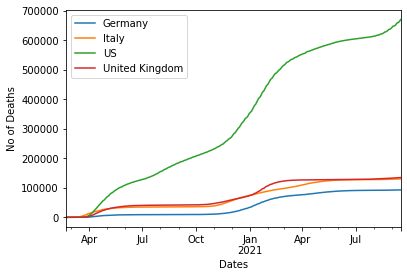

In [12]:
from matplotlib import pyplot
df1.plot()
pyplot.xlabel('Dates')
pyplot.ylabel('No of Deaths')
pyplot.show()

### Bar Chart

Bar charts can be very effective when comparing different variables for a single point in time.

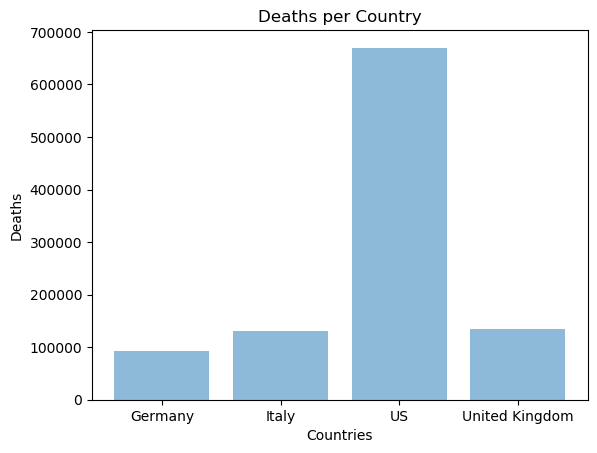

In [13]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
objects = df1.max().index
y_pos = np.arange(len(objects))
performance = df1.tail(1).values.tolist()[0]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Deaths')
plt.xlabel('Countries')
plt.title('Deaths per Country')
plt.show()

### Pie Chart

Pie Charts is another great way to show the relative size between different data sets; much like the bar chart.

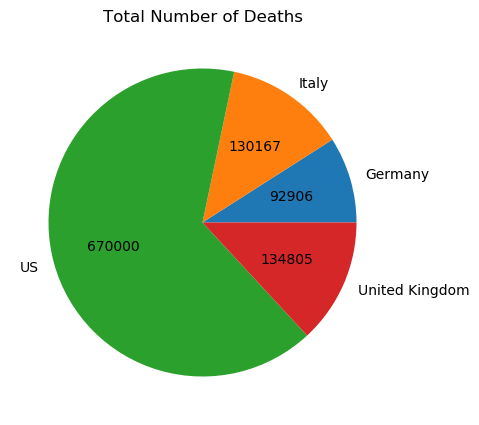

In [14]:
from matplotlib import pyplot
import numpy as np

def absolute_value(val):
    a  = np.round(val/100.*df1.max().sum(), 0)
    return int(a)
plot = df1.max().plot.pie(y=df1.max().index, figsize=(5, 5),autopct=absolute_value, label='')
plot.set_title('Total Number of Deaths', fontsize=12)
pyplot.show()

### Heat Map

Heat Maps is a more advanced visualisation technique that allows us to present time-series data across different variables, further compared by colours.

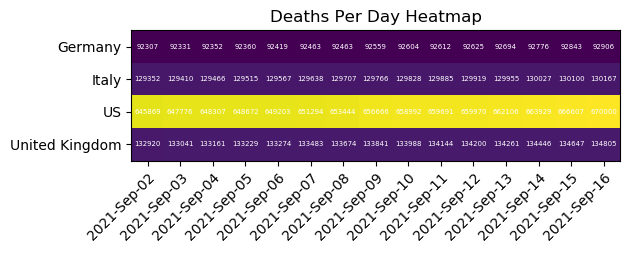

In [17]:
import numpy as np
from matplotlib import pyplot
df1 = df1.tail(15)
dates = df1.index.strftime('%Y-%b-%d')
countries = df1.max().index
df2 = pd.DataFrame(df1, columns=df1.columns).astype(int)
matrix = np.array(df2).transpose()
fig, ax = pyplot.subplots()
im = ax.imshow(matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(len(dates)))
ax.set_yticks(np.arange(len(countries)))
# ... and label them with the respective list entries
ax.set_xticklabels(dates)
ax.set_yticklabels(countries)
# Rotate the tick labels and set their alignment.
pyplot.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for i in range(len(dates)):
    for j in range(len(countries)):
        text = ax.text(i, j, matrix[j, i],
                       ha="center", va="center", color="w", size = '5')
ax.set_title("Deaths Per Day Heatmap")
fig.tight_layout()
pyplot.show()